In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import matplotlib
import scipy.sparse as sparse
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

/Users/Future/Library/Python/3.6/lib/python/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path_to_save = "../results/Figures/Figure 3/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [3]:
hpoly = sc.read("../data/train_hpoly.h5ad")
hpoly

AnnData object with n_obs × n_vars = 5059 × 7000 
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_counts', 'n_genes', 'mt_frac'
    var: 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_label_colors', 'condition_colors', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'

In [4]:
hpoly.obs['condition'].value_counts()

Control        2736
Hpoly.Day10    2323
Name: condition, dtype: int64

In [5]:
hpoly.obs['cell_label'].value_counts()

Stem                     1048
TA.Early                 1032
Enterocyte.Progenitor     983
TA                        662
Enterocyte                467
Goblet                    456
Tuft                      248
Endocrine                 163
Name: cell_label, dtype: int64

In [6]:
salmonella = sc.read("../data/train_salmonella.h5ad")
salmonella

AnnData object with n_obs × n_vars = 4259 × 7000 
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_counts', 'n_genes', 'mt_frac'
    var: 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_label_colors', 'condition_colors', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'

In [7]:
salmonella.obs['condition'].value_counts()

Control       2765
Salmonella    1494
Name: condition, dtype: int64

In [8]:
salmonella.obs['cell_label'].value_counts()

Enterocyte               961
TA.Early                 926
Stem                     744
Enterocyte.Progenitor    664
TA                       445
Goblet                   293
Endocrine                160
Tuft                      66
Name: cell_label, dtype: int64

In [9]:
hpoly_reconstructed = sc.read("../data/reconstructed/scGen/hpoly.h5ad")
salmonella_reconstructed = sc.read("../data/reconstructed/scGen/salmonella.h5ad")

In [10]:
salmonella_reconstructed.obs['condition'].value_counts()

TA.Early_pred_stim                 676
TA.Early_ctrl                      676
Enterocyte_real_stim               594
Stem_pred_stim                     570
Stem_ctrl                          570
Enterocyte.Progenitor_ctrl         466
Enterocyte.Progenitor_pred_stim    466
Enterocyte_ctrl                    367
Enterocyte_pred_stim               367
TA_pred_stim                       350
TA_ctrl                            350
TA.Early_real_stim                 250
Enterocyte.Progenitor_real_stim    198
Goblet_pred_stim                   190
Goblet_ctrl                        190
Stem_real_stim                     174
Goblet_real_stim                   103
Endocrine_pred_stim                 98
Endocrine_ctrl                      98
TA_real_stim                        95
Endocrine_real_stim                 62
Tuft_pred_stim                      48
Tuft_ctrl                           48
Tuft_real_stim                      18
Name: condition, dtype: int64

In [11]:
hpoly_reconstructed.obs['condition'].value_counts()

TA.Early_pred_stim                 666
TA.Early_ctrl                      666
Stem_pred_stim                     556
Stem_ctrl                          556
Enterocyte.Progenitor_real_stim    517
Stem_real_stim                     492
Enterocyte.Progenitor_ctrl         466
Enterocyte.Progenitor_pred_stim    466
TA.Early_real_stim                 366
Enterocyte_pred_stim               361
Enterocyte_ctrl                    361
TA_pred_stim                       357
TA_ctrl                            357
TA_real_stim                       305
Goblet_real_stim                   272
Tuft_real_stim                     195
Goblet_ctrl                        184
Goblet_pred_stim                   184
Enterocyte_real_stim               106
Endocrine_pred_stim                 93
Endocrine_ctrl                      93
Endocrine_real_stim                 70
Tuft_pred_stim                      53
Tuft_ctrl                           53
Name: condition, dtype: int64

### Figure 3.a

0.9705966791023227
0.9844520591667791


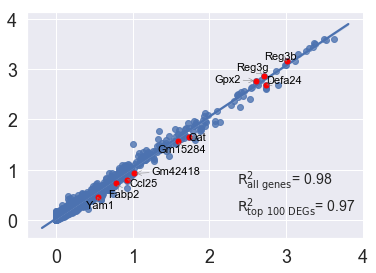

In [12]:
cell_type = "TA.Early"
conditions = {"ctrl": f"{cell_type}_ctrl", "pred_stim": f"{cell_type}_pred_stim", "real_stim": f"{cell_type}_real_stim"}
hpoly_cell = hpoly[hpoly.obs["cell_label"] == cell_type] 
sc.tl.rank_genes_groups(hpoly_cell, groupby="condition", n_genes=100, method="wilcoxon")
diff_genes = hpoly_cell.uns["rank_genes_groups"]["names"]["Hpoly.Day10"].tolist()[:50] \
           + hpoly_cell.uns["rank_genes_groups"]["names"]["Control"].tolist()[:50]
scgen.plotting.reg_mean_plot(hpoly_reconstructed, 
                             labels={"x": "", "y": ""},
                             condition_key="condition",
                             axis_keys={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                             gene_list=diff_genes[:5] + diff_genes[50:55],
                             top_100_genes=diff_genes,
                             path_to_save=os.path.join(path_to_save, f"Fig3a_hpoly_reg_mean.pdf"),
                             legend=False,
                             fontsize=18,
                             textsize=14,
                             x_coeff=0.35,
                             title="",
                             show=True)

### Figure 3.b

0.9720322639792356
0.9812218771281355


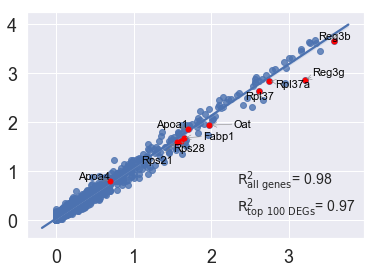

In [13]:
cell_type = "TA.Early"
conditions = {"ctrl": f"{cell_type}_ctrl", "pred_stim": f"{cell_type}_pred_stim", "real_stim": f"{cell_type}_real_stim"}
salmonella_cell = salmonella[salmonella.obs["cell_label"] == cell_type]
sc.tl.rank_genes_groups(salmonella_cell, groupby="condition", n_genes=100, method="wilcoxon")
diff_genes = salmonella_cell.uns["rank_genes_groups"]["names"]["Salmonella"].tolist()[:50] \
           + salmonella_cell.uns["rank_genes_groups"]["names"]["Control"].tolist()[:50]
scgen.plotting.reg_mean_plot(salmonella_reconstructed,
                             labels={"x": "", "y": ""},
                             condition_key="condition",
                             axis_keys={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                             gene_list=diff_genes[:5] + diff_genes[50:55],
                             top_100_genes=diff_genes,
                             path_to_save=os.path.join(path_to_save, f"Fig3b_salmonella_reg_mean.pdf"),
                             fontsize=18, 
                             textsize=14,
                             x_coeff=0.35,
                             legend=False,
                             title="",
                             range=[0, 5, 1],
                             show=True)

### Figure 3.c

In [14]:
def calc_R2(adata, data_name, cell_type, n_genes=6998, conditions=None):
    if n_genes != adata.shape[1]:
        adata_cell = adata[adata.obs["cell_label"] == cell_type]
        print(adata_cell.obs["condition"].unique().tolist())
        sc.tl.rank_genes_groups(adata_cell, groupby="condition", n_genes=n_genes, method="wilcoxon")
        diff_genes = adata_cell.uns["rank_genes_groups"]["names"][conditions["real_stim"]].tolist()[:n_genes//2] \
                   + adata_cell.uns["rank_genes_groups"]["names"][conditions["ctrl"]].tolist()[:n_genes//2]
        adata = adata[:, diff_genes]
    r_values = np.zeros((1, 100))
    real_stim = adata[adata.obs["condition"] == conditions["real_stim"]]
    pred_stim = adata[adata.obs["condition"] == conditions["pred_stim"]]
    for i in range(100):
        pred_stim_idx = np.random.choice(range(0, pred_stim.shape[0]), int(0.8 * pred_stim.shape[0]))
        real_stim_idx = np.random.choice(range(0, real_stim.shape[0]), int(0.8 * real_stim.shape[0]))
        if sparse.issparse(pred_stim.X):
            pred_stim.X = pred_stim.X.A
            real_stim.X = real_stim.X.A
        x = np.average(pred_stim.X[pred_stim_idx], axis=0)
        y = np.average(real_stim.X[real_stim_idx], axis=0)
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        r_values[0, i] = r_value ** 2
    return r_values.mean(), r_values.std()

In [15]:
def calc_R2_mean_var(adata, data_name, cell_types, n_genes):
    r2_means, r2_vars = [], []
    for cell_type in cell_types:
        conditions = {"ctrl": cell_type+"_ctrl" ,"real_stim": cell_type+"_real_stim", "pred_stim": cell_type+"_pred_stim"}
        r2_mean, r2_var = calc_R2(adata, data_name, cell_type, n_genes=n_genes, conditions=conditions)
        r2_means.append(r2_mean)
        r2_vars.append(r2_var)
    return r2_means, r2_vars

In [16]:
cell_types = hpoly.obs["cell_label"].unique().tolist()
cell_types

['Enterocyte.Progenitor',
 'Stem',
 'TA.Early',
 'TA',
 'Tuft',
 'Enterocyte',
 'Goblet',
 'Endocrine']

In [17]:
r2_top100_means, r2_top100_vars = calc_R2_mean_var(hpoly_reconstructed, "hpoly", cell_types=cell_types, n_genes=100)
r2_all_means, r2_all_vars = calc_R2_mean_var(hpoly_reconstructed, "hpoly", cell_types=cell_types, n_genes=hpoly_reconstructed.shape[1])

['Enterocyte.Progenitor_ctrl', 'Enterocyte.Progenitor_pred_stim', 'Enterocyte.Progenitor_real_stim']
['Stem_ctrl', 'Stem_pred_stim', 'Stem_real_stim']
['TA.Early_ctrl', 'TA.Early_pred_stim', 'TA.Early_real_stim']
['TA_ctrl', 'TA_pred_stim', 'TA_real_stim']
['Tuft_ctrl', 'Tuft_pred_stim', 'Tuft_real_stim']
['Enterocyte_ctrl', 'Enterocyte_pred_stim', 'Enterocyte_real_stim']
['Goblet_ctrl', 'Goblet_pred_stim', 'Goblet_real_stim']
['Endocrine_ctrl', 'Endocrine_pred_stim', 'Endocrine_real_stim']


In [18]:
all_means = np.concatenate((r2_top100_means, r2_all_means), axis=0)
all_vars = np.concatenate((r2_top100_vars, r2_all_vars), axis=0)
all_types = ["top 100 DEGs"] * len(r2_top100_means) + ["all genes"] * len(r2_top100_means)
cell_types_x = 2 * cell_types
df = pd.DataFrame({"R^2 Means": all_means, "R^2 Stddevs": all_vars, "Type": all_types, "Cell Types": cell_types_x})
df

,R^2 Means,R^2 Stddevs,Type,Cell Types
0,0.943832,0.005615,top 100 DEGs,Enterocyte.Progenitor
1,0.948068,0.005001,top 100 DEGs,Stem
2,0.975318,0.002858,top 100 DEGs,TA.Early
3,0.952936,0.007723,top 100 DEGs,TA
4,0.867055,0.027898,top 100 DEGs,Tuft
5,0.864169,0.012683,top 100 DEGs,Enterocyte
6,0.896065,0.014864,top 100 DEGs,Goblet
7,0.876995,0.015053,top 100 DEGs,Endocrine
8,0.974823,0.001841,all genes,Enterocyte.Progenitor
9,0.975685,0.001642,all genes,Stem


In [19]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                '%.2f' % float(height),
                ha='center', va='bottom', fontsize=14)

In [20]:
def grouped_barplot(df, cat, subcat, val, err, filename, put_label=False, legend=False, offset=0.375):
    plt.close("all")
#     import matplotlib
    matplotlib.rc('ytick', labelsize=25)
    matplotlib.rc('xtick', labelsize=30)
    u = df[cat].unique()
    x_pos = np.arange(0, 2*len(u), 2)
    subx = df[subcat].unique()
    plt.figure(figsize=(12, 12))
#     g = sns.catplot(x=cat, y=val, hue=subcat, data=df, kind='bar', palette="muted", height=6, legend=False)
#     g.despine(left=True)
#     plt.yticks(np.arange(0, 1.2, 0.2))
#     g.set_xticklabels(rotation=90)
#     g.set_xlabels("")
    for i, gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        b = plt.bar(x_pos + i/1.25, dfg[val].values, capsize=10, alpha=0.95, label=f"{gr}", yerr=dfg[err].values)
        a=np.random.normal(dfg[val].values, dfg[err].values, (50, len(u)))
#         print(a.shape)
#         dfc=pd.DataFrame({'x': x_pos + i/1.25, 'y': a[0]})
        plt.plot(x_pos + i/1.25, a.T, '.', color='black', alpha=0.5)
        if put_label:
            autolabel(b)
    
    plt.ylabel(r"$\mathrm{R^2}$", fontsize=25)
    plt.xticks(x_pos+offset, u, rotation=90)
    plt.yticks(np.arange(0, 1.2, .2))
    if legend:
        plt.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, prop={'size': 18})
    plt.tight_layout()
    plt.savefig(os.path.join(path_to_save, filename), dpi=300)
    plt.show()

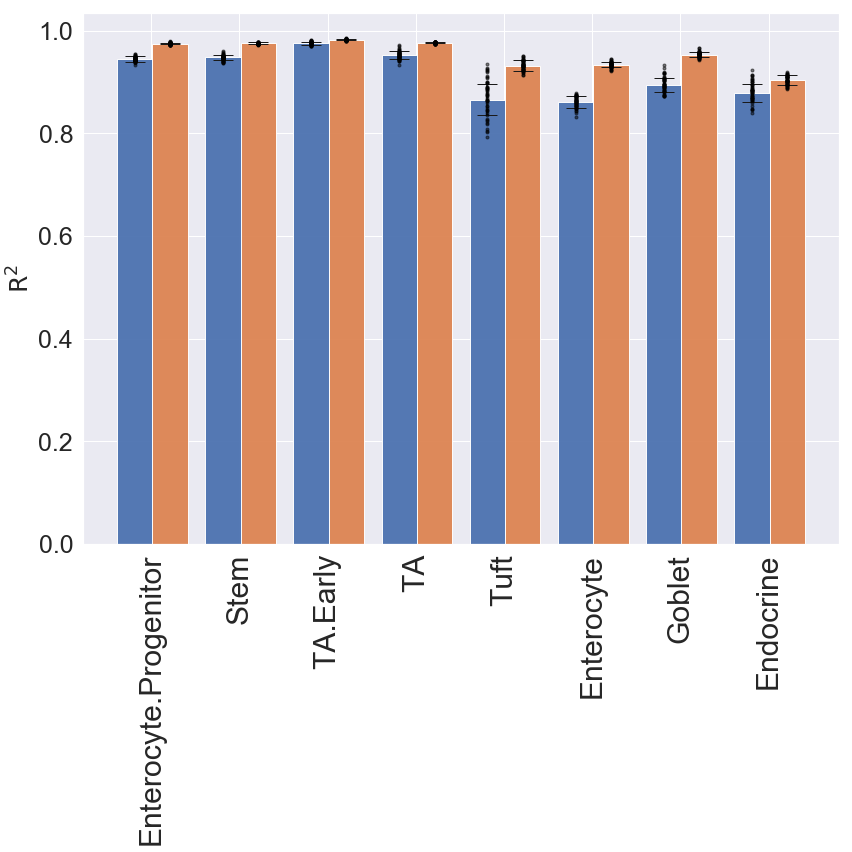

In [15]:
sns.set()
grouped_barplot(df, "Cell Types", "Type", "R^2 Means", "R^2 Stddevs", filename="Fig3c_hpoly_celltypes_barplots.pdf")

### Figure 3.d

In [16]:
r2_top100_means, r2_top100_vars = calc_R2_mean_var(salmonella_reconstructed, "salmonella", cell_types=cell_types, n_genes=100)
r2_all_means, r2_all_vars = calc_R2_mean_var(salmonella_reconstructed, "salmonella", cell_types=cell_types, n_genes=salmonella_reconstructed.shape[1])

['Enterocyte.Progenitor_ctrl', 'Enterocyte.Progenitor_pred_stim', 'Enterocyte.Progenitor_real_stim']
['Stem_ctrl', 'Stem_pred_stim', 'Stem_real_stim']
['TA.Early_ctrl', 'TA.Early_pred_stim', 'TA.Early_real_stim']
['TA_ctrl', 'TA_pred_stim', 'TA_real_stim']
['Tuft_ctrl', 'Tuft_pred_stim', 'Tuft_real_stim']
['Enterocyte_ctrl', 'Enterocyte_pred_stim', 'Enterocyte_real_stim']
['Goblet_ctrl', 'Goblet_pred_stim', 'Goblet_real_stim']
['Endocrine_ctrl', 'Endocrine_pred_stim', 'Endocrine_real_stim']


In [17]:
all_means = np.concatenate((r2_top100_means, r2_all_means), axis=0)
all_vars = np.concatenate((r2_top100_vars, r2_all_vars), axis=0)
all_types = ["top 100 DEGs"] * len(r2_top100_means) + ["all genes"] * len(r2_top100_means)
cell_types_x = 2 * cell_types
df = pd.DataFrame({"R^2 Means": all_means, "R^2 Stddevs": all_vars, "Type": all_types, "Cell Types": cell_types_x})
df

,R^2 Means,R^2 Stddevs,Type,Cell Types
0,0.980606,0.004494,top 100 DEGs,Enterocyte.Progenitor
1,0.969274,0.005108,top 100 DEGs,Stem
2,0.974270,0.003193,top 100 DEGs,TA.Early
3,0.976522,0.003602,top 100 DEGs,TA
4,0.699496,0.074398,top 100 DEGs,Tuft
5,0.897472,0.006561,top 100 DEGs,Enterocyte
6,0.903046,0.023587,top 100 DEGs,Goblet
7,0.844137,0.033266,top 100 DEGs,Endocrine
8,0.982809,0.001279,all genes,Enterocyte.Progenitor
9,0.973723,0.001490,all genes,Stem


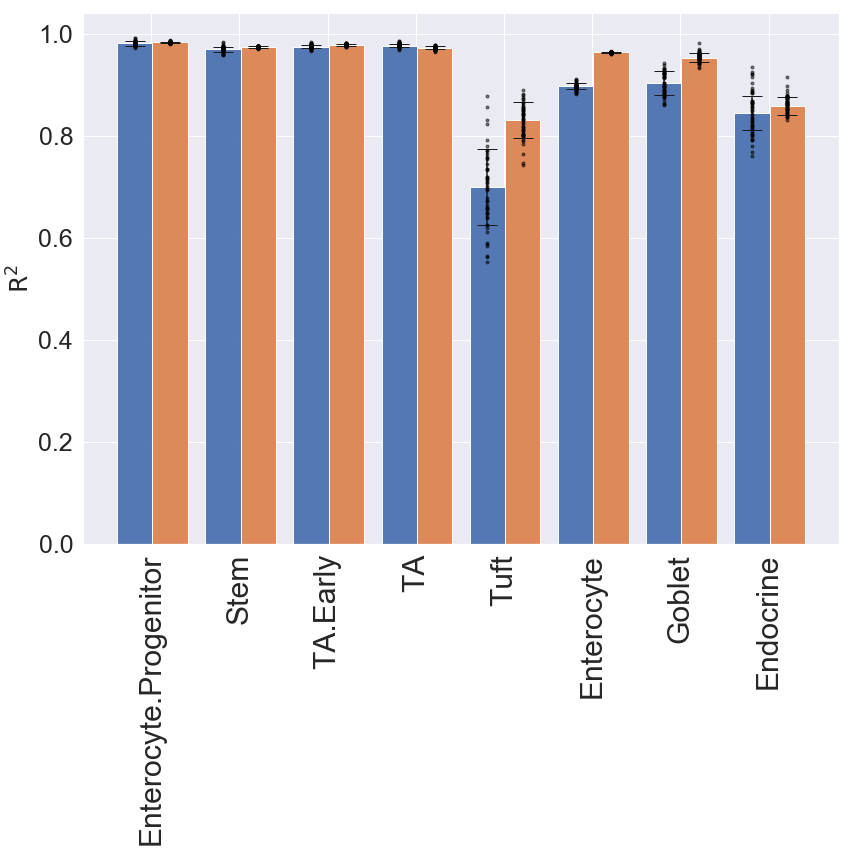

In [18]:
grouped_barplot(df, "Cell Types", "Type", "R^2 Means", "R^2 Stddevs", filename="Fig3d_salmonella_celltypes_barplots.pdf")